# Homework 2 - IEEE Fraud Detection

### Imports

In [1]:
import pandas as pd
import numpy as np
# To embed HTML in Python Notebook Output
# https://stackoverflow.com/questions/25698448/how-to-embed-html-into-ipython-output
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import operator
import collections

### Function to Get data from file/URL

In [2]:
def getData(urlOrFileLocation):
    return pd.read_csv(urlOrFileLocation)

### Some Basic Stats about Data

In [3]:
train_transaction = getData("../IEEE_CIS_Fraud_Transaction_Data/train_transaction.csv")
train_identity = getData("../IEEE_CIS_Fraud_Transaction_Data/train_identity.csv")
test_transaction = getData("../IEEE_CIS_Fraud_Transaction_Data/test_transaction.csv")
test_identity = getData("../IEEE_CIS_Fraud_Transaction_Data/test_identity.csv")

'''train_transactions_and_identity = pd.merge(train_transaction,
                                           train_identity,
                                           left_on = 'TransactionID', 
                                           right_on = 'TransactionID', 
                                           how = 'outer').filter(['TransactionID',
                                                                    'DeviceType',
                                                                    'DeviceInfo', 
                                                                    'TransactionDT',
                                                                    'TransactionAmt',
                                                                    'ProductCD',
                                                                    'card4',
                                                                    'card6',
                                                                    'P_emaildomain',
                                                                    'R_emaildomain',
                                                                    'addr1','addr2',
                                                                    'dist1','dist2','isFraud'])
'''
'''column_names = ['TransactionID',
                'TransactionDT',
                'TransactionAmt',
                'ProductCD',
                'card1',
                'card2',
                'card3',
                'card4',
                'card5',
                'card6',
                'addr1',
                'addr2',
                'dist1',
                'dist2',
                'P_emaildomain',
                'R_emaildomain',
                'id_01',
                'id_02',
                'id_03',
                'id_04',
                'id_05',
                'id_06',
                'id_07',
                'id_08',
                'id_09',
                'id_10',
                'id_11',
                'id_12',
                'id_13',
                'id_14',
                'id_15',
                'id_16',
                'id_17',
                'id_18',
                'id_19',
                'id_20',
                'id_21',
                'id_22',
                'id_23',
                'id_24',
                'id_25',
                'id_26',
                'id_27',
                'id_28',
                'id_29',
                'id_30',
                'id_31',
                'id_32',
                'id_33',
                'id_34',
                'id_35',
                'id_36',
                'id_37',
                'id_38',
                'DeviceType',
                'DeviceInfo',
                'isFraud']
'''

column_names = ['TransactionID',
                'DeviceType',
                'DeviceInfo', 
                'TransactionDT',
                'TransactionAmt',
                'ProductCD',
                'card4',
                'card6',
                'P_emaildomain',
                'R_emaildomain',
                'addr1','addr2',
                'dist1','dist2','isFraud']
train_transactions_and_identity = pd.merge(train_transaction,
                                           train_identity,
                                           left_on = 'TransactionID', 
                                           right_on = 'TransactionID', 
                                           how = 'left').filter(column_names)

test_transactions_and_identity = pd.merge(test_transaction,
                                           test_identity,
                                           left_on = 'TransactionID', 
                                           right_on = 'TransactionID', 
                                           how = 'left').filter(column_names)


In [4]:
# To embed HTML in Python Notebook Output
# https://stackoverflow.com/questions/25698448/how-to-embed-html-into-ipython-output
print("Number of Rows in Data before Data Preprocessing - "+str(train_transaction.shape[0])+"")
print("Number of Columns  - "+str(train_transaction.shape[1])+"")
print(train_transactions_and_identity.dtypes)

Number of Rows in Data before Data Preprocessing - 590540
Number of Columns  - 394
TransactionID       int64
DeviceType         object
DeviceInfo         object
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card4              object
card6              object
P_emaildomain      object
R_emaildomain      object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
isFraud             int64
dtype: object


### Lets have a small peek into the data

In [5]:
train_transactions_and_identity.head(3)

,TransactionID,DeviceType,DeviceInfo,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,isFraud
0,2987000,NaN,NaN,86400,68.5,W,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN,0
1,2987001,NaN,NaN,86401,29.0,W,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN,0
2,2987002,NaN,NaN,86469,59.0,W,visa,debit,outlook.com,NaN,330.0,87.0,287.0,NaN,0


#### As we can see just from the first 3 rows, there are a lot of NaN (or null) values.
#### We need to preprocess the data before we can build models
#### However, lets keep that aside and do the target points of the questions


## Part 1 - Fraudulent vs Non-Fraudulent Transaction

Filter out your data to examine just the fraudulent transactions. For each field above, examine the distribution of the values, and explain any interesting insight you get from this.  How do the distributions on fraudulent transactions compare to the non-fraudulent ones?  (15 points)


### <u> Steps </u>
Let's filter out rows that are fraud. We see a column called **isFraud** (from the small peek into data) . Let's see its possible values and counts

In [6]:
train_transactions_and_identity['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

According to Kaggle, **0** denoted **not fraud** and **1** denotes **fraud**.
<br/>
Let's just cut out the rows with fraud and analyze the data
<br/>
(Similarly repeat it for rows without fraud)

In [7]:
train_transaction_fraud = train_transaction.loc[train_transaction["isFraud"] == 1]
train_transaction_notFraud = train_transaction.loc[train_transaction["isFraud"] == 0]

The homework specified to look into the following columns only

* TransactionID
* DeviceType (mobile/desktop/...)
* DeviceInfo (Windows/MacOS/…)
* TransactionDT (time delta from reference)
* TransactionAmt (amount in USD)
* ProductCD (product code - W/C/H/R/...)
* card4 (card issuer)
* card6 (debit/credit)
* P_emaildomain (purchaser email)
* R_emaildomain (recipient email)
* addr1 / addr2 (billing region / billing country)
* dist1 / dist2 (some form of distance - address, zip code, IP, phone, …)

Let's see the distribution of TransactionAmt - all transaction amounts, the ones with fraud and ones with no fraud.


Text(0, 0.5, 'Frequency')

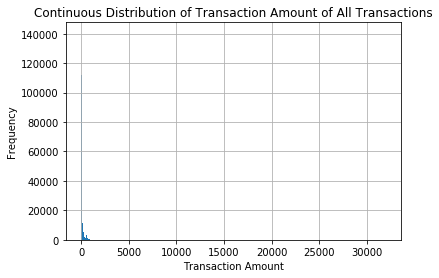

In [8]:
hist1 = train_transaction['TransactionAmt'].hist(bins = 1500)
hist1.set_title("Continuous Distribution of Transaction Amount of All Transactions")
hist1.set_xlabel("Transaction Amount")
hist1.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

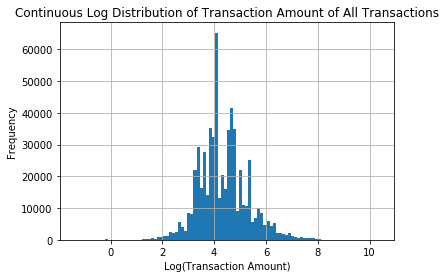

In [9]:
hist1 = train_transaction['TransactionAmt'].apply(np.log).hist(bins = 100)
hist1.set_title("Continuous Log Distribution of Transaction Amount of All Transactions")
hist1.set_xlabel("Log(Transaction Amount)")
hist1.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

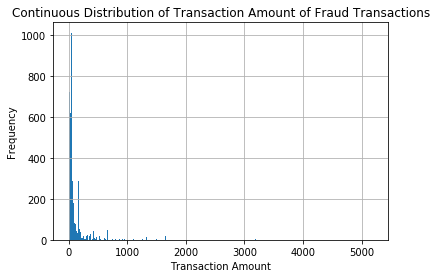

In [10]:
hist2 = train_transaction_fraud['TransactionAmt'].hist(bins = 1500)
hist2.set_title("Continuous Distribution of Transaction Amount of Fraud Transactions")
hist2.set_xlabel("Transaction Amount")
hist2.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

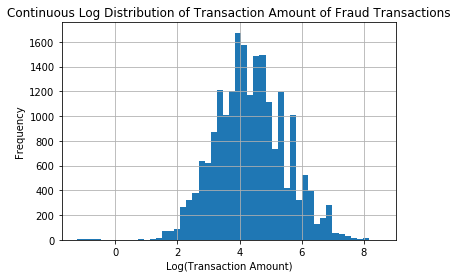

In [11]:
hist2 = train_transaction_fraud['TransactionAmt'].apply(np.log).hist(bins = 50)
hist2.set_title("Continuous Log Distribution of Transaction Amount of Fraud Transactions")
hist2.set_xlabel("Log(Transaction Amount)")
hist2.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

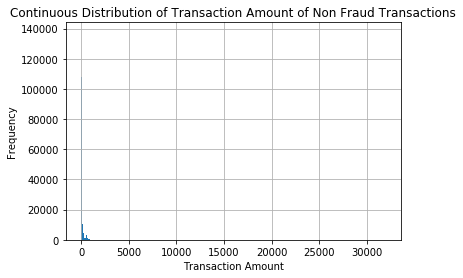

In [12]:
hist3 = train_transaction_notFraud['TransactionAmt'].hist(bins = 1500)
hist3.set_title("Continuous Distribution of Transaction Amount of Non Fraud Transactions")
hist3.set_xlabel("Transaction Amount")
hist3.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

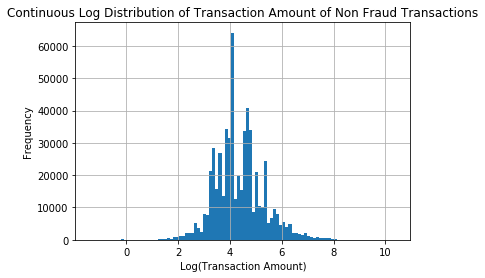

In [13]:
hist3 = train_transaction_notFraud['TransactionAmt'].apply(np.log).hist(bins = 100)
hist3.set_title("Continuous Log Distribution of Transaction Amount of Non Fraud Transactions")
hist3.set_xlabel("Log(Transaction Amount)")
hist3.set_ylabel("Frequency")

Plotting Distribution of Transaction IDs will not yield any useful result as each Transaction ID is unique.

Text(0, 0.5, 'Frequency')

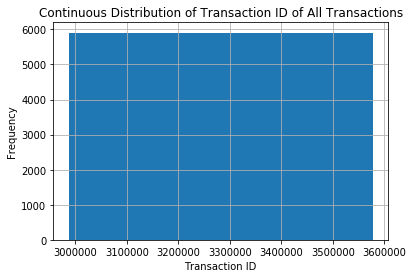

In [14]:
hist1 = train_transaction['TransactionID'].hist(bins = 100)
hist1.set_title("Continuous Distribution of Transaction ID of All Transactions")
hist1.set_xlabel("Transaction ID")
hist1.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

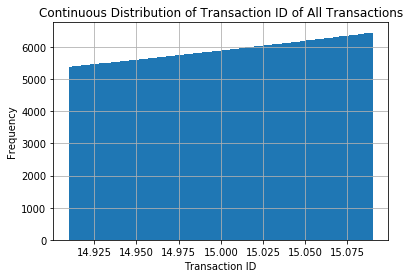

In [15]:
hist1 = train_transaction['TransactionID'].apply(np.log).hist(bins = 100)
hist1.set_title("Continuous Distribution of Transaction ID of All Transactions")
hist1.set_xlabel("Transaction ID")
hist1.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

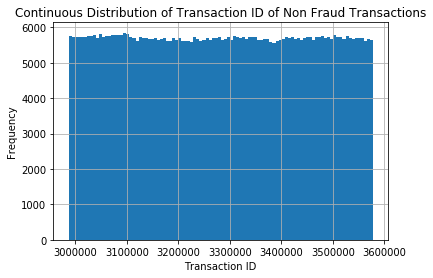

In [16]:
hist1 = train_transaction.loc[train_transaction['isFraud'] == 0]['TransactionID'].hist(bins = 100)
hist1.set_title("Continuous Distribution of Transaction ID of Non Fraud Transactions")
hist1.set_xlabel("Transaction ID")
hist1.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

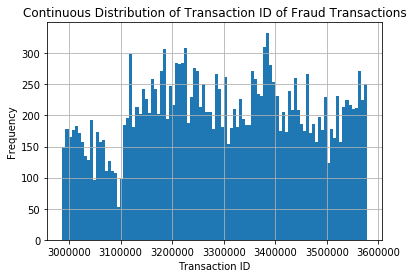

In [17]:
hist1 = train_transaction.loc[train_transaction['isFraud'] == 1]['TransactionID'].hist(bins = 100)
hist1.set_title("Continuous Distribution of Transaction ID of Fraud Transactions")
hist1.set_xlabel("Transaction ID")
hist1.set_ylabel("Frequency")

Let's see the device info of all transactions, fraud transactions and non fraud transactions

In [18]:
def getFrequencyCount(dataframe, columnName, resetIndexName):
    a = dataframe[columnName].value_counts()
    tt = a.rename_axis(columnName).reset_index(name = resetIndexName)
    return tt

Top 15 DeviceInfo Entries for All Transactions


Text(0, 0.5, 'Frequency')

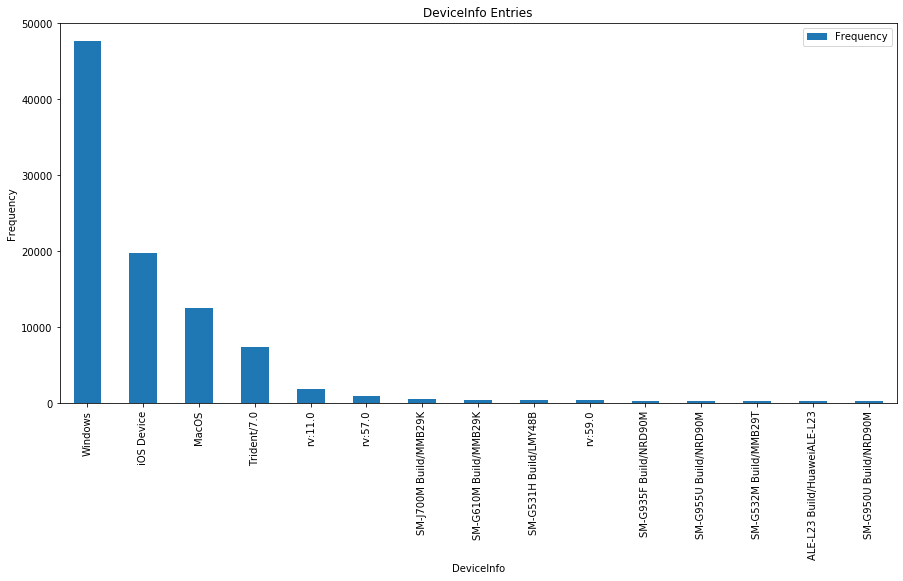

In [19]:
DeviceInfoFrequencyCount = getFrequencyCount(train_transactions_and_identity, 'DeviceInfo', 'Frequency')
topNumber = 15
print("Top "+str(topNumber)+" DeviceInfo Entries for All Transactions")
DeviceInfoFrequencyCount.head(topNumber)

difc_all_plot = DeviceInfoFrequencyCount.head(topNumber).plot(kind = 'bar', x = 'DeviceInfo', figsize = (15,7))
difc_all_plot.set_title('DeviceInfo Entries')
difc_all_plot.set_xlabel('DeviceInfo')
difc_all_plot.set_ylabel('Frequency')


In [20]:
print("Top "+str(topNumber)+" DeviceInfo Entries for Fraud Transactions ")
DeviceInfoFraudFrequencyCount = getFrequencyCount(train_transactions_and_identity.loc[train_transactions_and_identity["isFraud"] == 1], 'DeviceInfo', 'Frequency')
DeviceInfoFraudFrequencyCount.head(topNumber)

Top 15 DeviceInfo Entries for Fraud Transactions 


,DeviceInfo,Frequency
0,Windows,3121
1,iOS Device,1240
2,MacOS,278
3,hi6210sft Build/MRA58K,180
4,SM-A300H Build/LRX22G,169
5,rv:57.0,103
6,Trident/7.0,96
7,rv:11.0,76
8,LG-D320 Build/KOT49I.V10a,61
9,SM-J700M Build/MMB29K,60


In [21]:
print("Top "+str(topNumber)+" DeviceInfo Entries for Non Fraud Transactions")
DeviceInfoNonFraudFrequencyCount = getFrequencyCount(train_transactions_and_identity.loc[train_transactions_and_identity["isFraud"] == 0], 'DeviceInfo', 'Frequency')
DeviceInfoNonFraudFrequencyCount.head(topNumber)

Top 15 DeviceInfo Entries for Non Fraud Transactions


,DeviceInfo,Frequency
0,Windows,44601
1,iOS Device,18542
2,MacOS,12295
3,Trident/7.0,7344
4,rv:11.0,1825
5,rv:57.0,859
6,SM-J700M Build/MMB29K,489
7,SM-G610M Build/MMB29K,424
8,SM-G531H Build/LMY48B,377
9,rv:59.0,318


Bar Graph of DeviceType Entries for All Transactions 


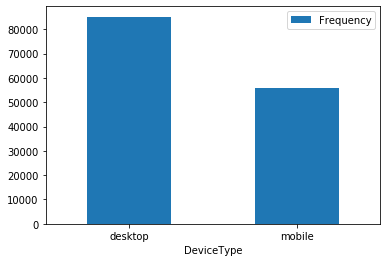

In [22]:
print("Bar Graph of DeviceType Entries for All Transactions ")
DeviceTypeFrequencyCount = getFrequencyCount(train_transactions_and_identity, 'DeviceType', 'Frequency')
#DeviceTypeFrequencyCount.head(topNumber)

DeviceTypeFrequencyCount.plot.bar(x = 'DeviceType', y = 'Frequency', rot = 0)

Bar Graph of DeviceType Entries for Non Fraud Transactions


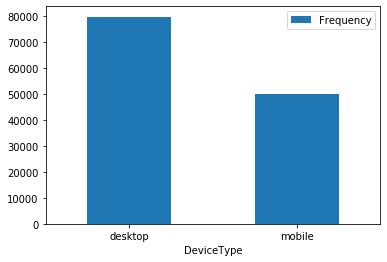

In [23]:
print("Bar Graph of DeviceType Entries for Non Fraud Transactions")
DeviceTypeNonFraudFrequencyCount = getFrequencyCount(train_transactions_and_identity.loc[train_transactions_and_identity["isFraud"] == 0], 'DeviceType', 'Frequency')
#DeviceTypeNonFraudFrequencyCount.head(topNumber)

DeviceTypeNonFraudFrequencyCount.plot.bar(x = 'DeviceType', y = 'Frequency', rot = 0)

Bar Graph of DeviceType Entries for Fraud Transactions


,DeviceType,Frequency
0,mobile,5657
1,desktop,5554


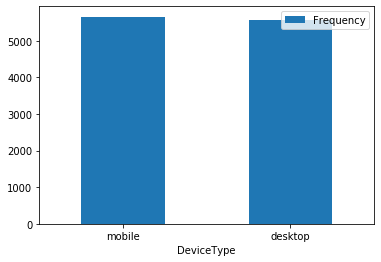

In [24]:
print("Bar Graph of DeviceType Entries for Fraud Transactions")
DeviceTypeFraudFrequencyCount = getFrequencyCount(train_transactions_and_identity.loc[train_transactions_and_identity["isFraud"] == 1], 'DeviceType', 'Frequency')


DeviceTypeFraudFrequencyCount.plot.bar(x = 'DeviceType', y = 'Frequency', rot = 0)
DeviceTypeFraudFrequencyCount.head(topNumber)

Device Type Entries for All, Non Fraud and Fraud Transactions


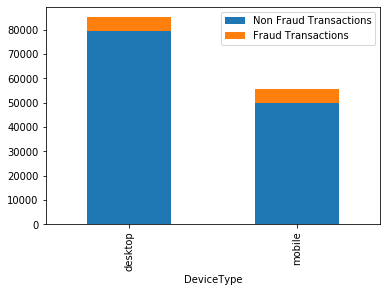

In [25]:
DeviceTypeFrequencyCount = DeviceTypeFrequencyCount.rename(columns = {'Frequency':'All Transactions'})
DeviceTypeNonFraudFrequencyCount = DeviceTypeNonFraudFrequencyCount.rename(columns = {'Frequency':'Non Fraud Transactions'})
DeviceTypeFraudFrequencyCount = DeviceTypeFraudFrequencyCount.rename(columns = {'Frequency':'Fraud Transactions'})

DeviceTypeCombinedFrequencyCount = pd.merge(DeviceTypeFrequencyCount,
                                           DeviceTypeNonFraudFrequencyCount,
                                           left_on = 'DeviceType', 
                                           right_on = 'DeviceType', 
                                           how = 'inner')

DeviceTypeCombinedFrequencyCount = pd.merge(DeviceTypeCombinedFrequencyCount,
                                           DeviceTypeFraudFrequencyCount,
                                           left_on = 'DeviceType', 
                                           right_on = 'DeviceType', 
                                           how = 'inner')


DeviceTypeCombinedFrequencyCount.plot(x="DeviceType", y=["Non Fraud Transactions", "Fraud Transactions"], kind="bar",stacked = 'True')
#sns.barplot(data = ProductCDCombinedFrequencyCount, x = 'ProductCD', y = 'Frequency', hue = 'Legend')

print("Device Type Entries for All, Non Fraud and Fraud Transactions")
DeviceTypeCombinedFrequencyCount.head(10)

DeviceTypeFrequencyCount = DeviceTypeFrequencyCount.rename(columns = {'All Transactions':'Frequency'})
DeviceTypeNonFraudFrequencyCount = DeviceTypeNonFraudFrequencyCount.rename(columns = {'Non Fraud Transactions':'Frequency'})
DeviceTypeFraudFrequencyCount = DeviceTypeFraudFrequencyCount.rename(columns = {'Fraud Transactions':'Frequency'})

In [26]:
print("Device Type Entries for All, Non Fraud and Fraud Transactions")
DeviceTypeCombinedFrequencyCount.head(10)

Device Type Entries for All, Non Fraud and Fraud Transactions


,DeviceType,All Transactions,Non Fraud Transactions,Fraud Transactions
0,desktop,85165,79611,5554
1,mobile,55645,49988,5657


In [27]:
DeviceTypeFrequencyCount = DeviceTypeFrequencyCount.rename(columns = {'All Transactions':'Frequency'})
DeviceTypeNonFraudFrequencyCount = DeviceTypeNonFraudFrequencyCount.rename(columns = {'Non Fraud Transactions':'Frequency'})
DeviceTypeFraudFrequencyCount = DeviceTypeFraudFrequencyCount.rename(columns = {'Fraud Transactions':'Frequency'})

From the above three tables, we see **DeviceType = 'mobile'** have more frauds than **DeviceType = 'desktop'** despite having more overall transactions with **DeviceType = 'desktop'**

Lets check for column **ProductCD**

ProductCD Entries for All, Non Fraud and Fraud Transactions


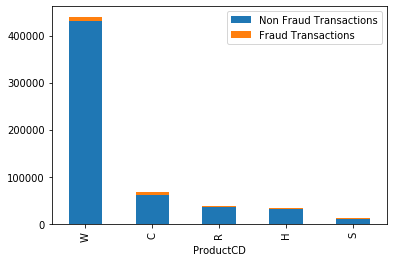

In [28]:
#display(HTML("<h4>ProductCD Entries for All Transactions </h4>"))
ProductCDFrequencyCount = getFrequencyCount(train_transaction, 'ProductCD', 'Frequency')
#ProductCDFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

#display(HTML("<h4>ProductCD Entries for Non Fraud Transactions </h4>"))
ProductCDNonFraudFrequencyCount = getFrequencyCount(train_transaction.loc[train_transaction["isFraud"] == 0], 'ProductCD', 'Frequency')
#ProductCDNonFraudFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

#display(HTML("<h4>ProductCD Entries for Fraud Transactions </h4>"))
ProductCDFraudFrequencyCount = getFrequencyCount(train_transaction.loc[train_transaction["isFraud"] == 1], 'ProductCD', 'Frequency')
#ProductCDFraudFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

ProductCDFrequencyCount = ProductCDFrequencyCount.rename(columns = {'Frequency':'All Transactions'})
ProductCDNonFraudFrequencyCount = ProductCDNonFraudFrequencyCount.rename(columns = {'Frequency':'Non Fraud Transactions'})
ProductCDFraudFrequencyCount = ProductCDFraudFrequencyCount.rename(columns = {'Frequency':'Fraud Transactions'})

ProductCDCombinedFrequencyCount = pd.merge(ProductCDFrequencyCount,
                                           ProductCDNonFraudFrequencyCount,
                                           left_on = 'ProductCD', 
                                           right_on = 'ProductCD', 
                                           how = 'inner')

ProductCDCombinedFrequencyCount = pd.merge(ProductCDCombinedFrequencyCount,
                                           ProductCDFraudFrequencyCount,
                                           left_on = 'ProductCD', 
                                           right_on = 'ProductCD', 
                                           how = 'inner')

#ProductCDCombinedFrequencyCount.head(20)

ProductCDCombinedFrequencyCount.plot(x="ProductCD", y=["Non Fraud Transactions", "Fraud Transactions"], kind="bar", stacked = 'True')
#sns.barplot(data = ProductCDCombinedFrequencyCount, x = 'ProductCD', y = 'Frequency', hue = 'Legend')

print("ProductCD Entries for All, Non Fraud and Fraud Transactions")
ProductCDCombinedFrequencyCount.head(10)

ProductCDFrequencyCount = ProductCDFrequencyCount.rename(columns = {'All Transactions':'Frequency'})
ProductCDNonFraudFrequencyCount = ProductCDNonFraudFrequencyCount.rename(columns = {'Non Fraud Transactions':'Frequency'})
ProductCDFraudFrequencyCount = ProductCDFraudFrequencyCount.rename(columns = {'Fraud Transactions':'Frequency'})


We can see that **ProductCD == 'W'** has the highest fraud among the multiple types of **ProductCD**

Lets see **card4** data

Card4 Entries for All, Non Fraud and Fraud Transactions


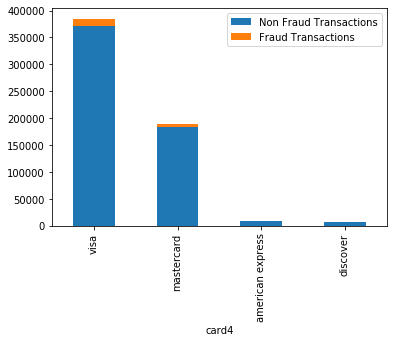

In [29]:
#display(HTML("<h4>ProductCD Entries for All Transactions </h4>"))
Card4FrequencyCount = getFrequencyCount(train_transaction, 'card4', 'Frequency')
#ProductCDFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

#display(HTML("<h4>ProductCD Entries for Non Fraud Transactions </h4>"))
Card4NonFraudFrequencyCount = getFrequencyCount(train_transaction.loc[train_transaction["isFraud"] == 0], 'card4', 'Frequency')
#ProductCDNonFraudFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

#display(HTML("<h4>ProductCD Entries for Fraud Transactions </h4>"))
Card4FraudFrequencyCount = getFrequencyCount(train_transaction.loc[train_transaction["isFraud"] == 1], 'card4', 'Frequency')
#ProductCDFraudFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

Card4FrequencyCount = Card4FrequencyCount.rename(columns = {'Frequency':'All Transactions'})
Card4NonFraudFrequencyCount = Card4NonFraudFrequencyCount.rename(columns = {'Frequency':'Non Fraud Transactions'})
Card4FraudFrequencyCount = Card4FraudFrequencyCount.rename(columns = {'Frequency':'Fraud Transactions'})

Card4CombinedFrequencyCount = pd.merge(Card4FrequencyCount,
                                           Card4NonFraudFrequencyCount,
                                           left_on = 'card4', 
                                           right_on = 'card4', 
                                           how = 'inner')

Card4CombinedFrequencyCount = pd.merge(Card4CombinedFrequencyCount,
                                           Card4FraudFrequencyCount,
                                           left_on = 'card4', 
                                           right_on = 'card4', 
                                           how = 'inner')

#ProductCDCombinedFrequencyCount.head(20)

Card4CombinedFrequencyCount.plot(x="card4", y=["Non Fraud Transactions", "Fraud Transactions"], kind="bar", stacked = 'True')
#sns.barplot(data = ProductCDCombinedFrequencyCount, x = 'ProductCD', y = 'Frequency', hue = 'Legend')

print("Card4 Entries for All, Non Fraud and Fraud Transactions")
ProductCDCombinedFrequencyCount.head(10)

Card4FrequencyCount = Card4FrequencyCount.rename(columns = {'All Transactions':'Frequency'})
Card4NonFraudFrequencyCount = Card4NonFraudFrequencyCount.rename(columns = {'Non Fraud Transactions':'Frequency'})
Card4FraudFrequencyCount = Card4FraudFrequencyCount.rename(columns = {'Fraud Transactions':'Frequency'})

Card6 Entries for All, Non Fraud and Fraud Transactions


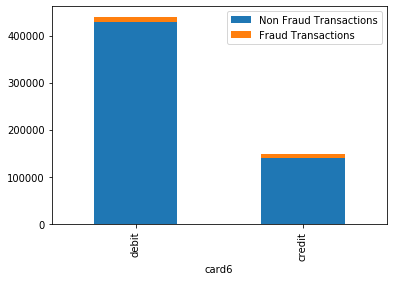

In [30]:
#display(HTML("<h4>ProductCD Entries for All Transactions </h4>"))
Card6FrequencyCount = getFrequencyCount(train_transaction, 'card6', 'Frequency')
#ProductCDFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

#display(HTML("<h4>ProductCD Entries for Non Fraud Transactions </h4>"))
Card6NonFraudFrequencyCount = getFrequencyCount(train_transaction.loc[train_transaction["isFraud"] == 0], 'card6', 'Frequency')
#ProductCDNonFraudFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

#display(HTML("<h4>ProductCD Entries for Fraud Transactions </h4>"))
Card6FraudFrequencyCount = getFrequencyCount(train_transaction.loc[train_transaction["isFraud"] == 1], 'card6', 'Frequency')
#ProductCDFraudFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

Card6FrequencyCount = Card6FrequencyCount.rename(columns = {'Frequency':'All Transactions'})
Card6NonFraudFrequencyCount = Card6NonFraudFrequencyCount.rename(columns = {'Frequency':'Non Fraud Transactions'})
Card6FraudFrequencyCount = Card6FraudFrequencyCount.rename(columns = {'Frequency':'Fraud Transactions'})

Card6CombinedFrequencyCount = pd.merge(Card6FrequencyCount,
                                           Card6NonFraudFrequencyCount,
                                           left_on = 'card6', 
                                           right_on = 'card6', 
                                           how = 'inner')

Card6CombinedFrequencyCount = pd.merge(Card6CombinedFrequencyCount,
                                           Card6FraudFrequencyCount,
                                           left_on = 'card6', 
                                           right_on = 'card6', 
                                           how = 'inner')

#ProductCDCombinedFrequencyCount.head(20)

Card6CombinedFrequencyCount.plot(x="card6", y=["Non Fraud Transactions", "Fraud Transactions"], kind="bar", stacked = 'true')
#sns.barplot(data = ProductCDCombinedFrequencyCount, x = 'ProductCD', y = 'Frequency', hue = 'Legend')

print("Card6 Entries for All, Non Fraud and Fraud Transactions")
Card6CombinedFrequencyCount.head(10)

Card6FrequencyCount = Card6FrequencyCount.rename(columns = {'All Transactions':'Frequency'})
Card6NonFraudFrequencyCount = Card6NonFraudFrequencyCount.rename(columns = {'Non Fraud Transactions':'Frequency'})
Card6FraudFrequencyCount = Card6FraudFrequencyCount.rename(columns = {'Fraud Transactions':'Frequency'})

P_emaildomain Entries for All, Non Fraud and Fraud Transactions


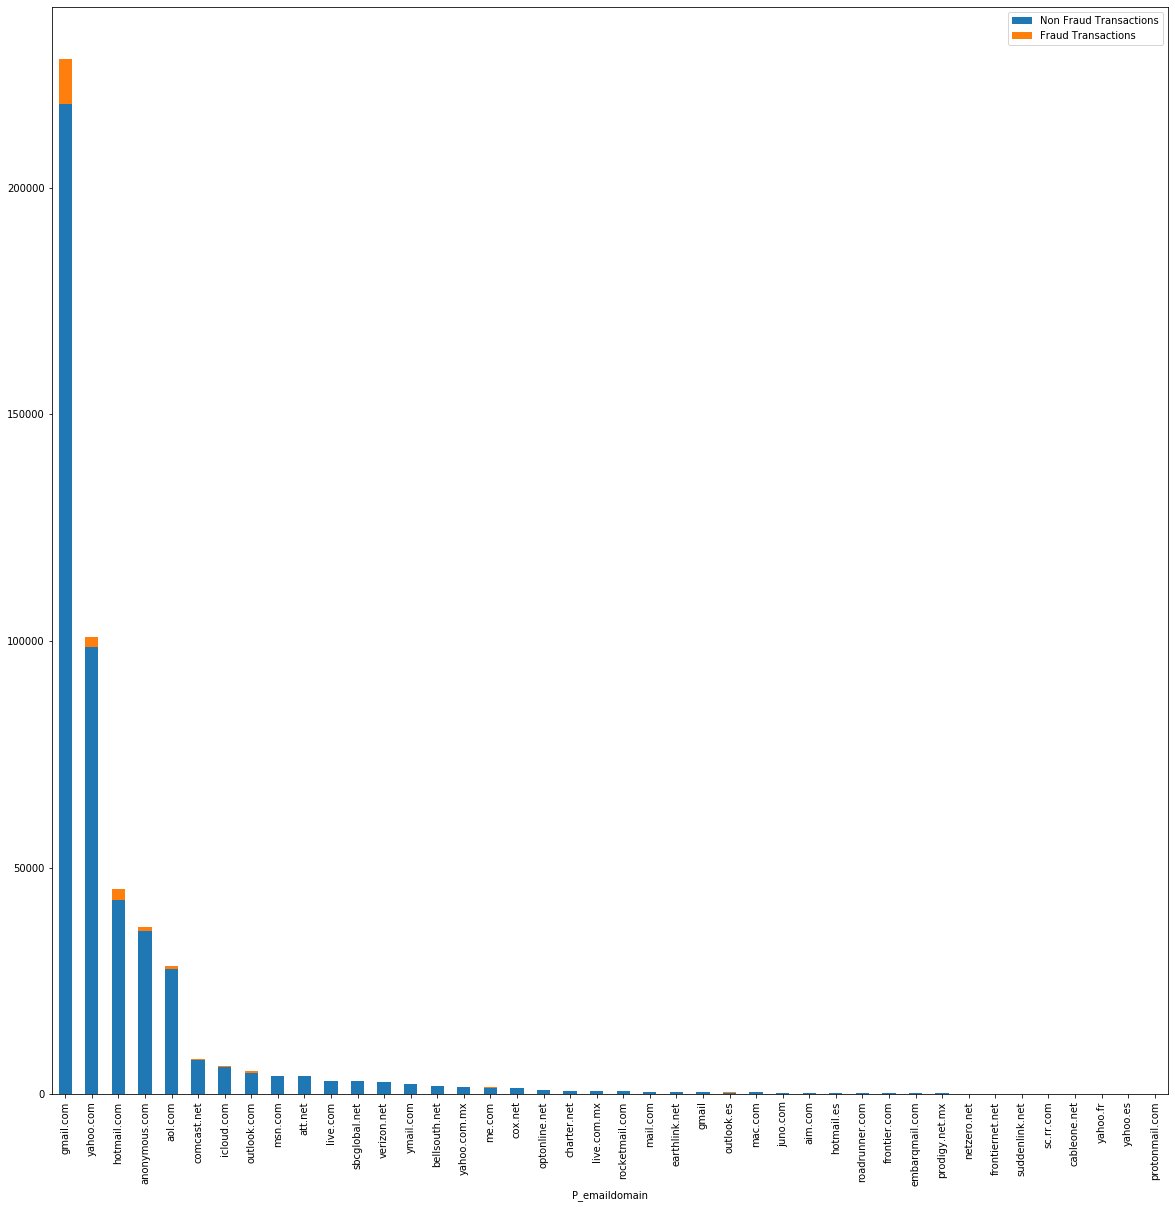

In [31]:
#display(HTML("<h4>ProductCD Entries for All Transactions </h4>"))
P_emaildomainFrequencyCount = getFrequencyCount(train_transaction, 'P_emaildomain', 'Frequency')
#ProductCDFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

#display(HTML("<h4>ProductCD Entries for Non Fraud Transactions </h4>"))
P_emaildomainNonFraudFrequencyCount = getFrequencyCount(train_transaction.loc[train_transaction["isFraud"] == 0], 'P_emaildomain', 'Frequency')
#ProductCDNonFraudFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

#display(HTML("<h4>ProductCD Entries for Fraud Transactions </h4>"))
P_emaildomainFraudFrequencyCount = getFrequencyCount(train_transaction.loc[train_transaction["isFraud"] == 1], 'P_emaildomain', 'Frequency')
#ProductCDFraudFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

P_emaildomainFrequencyCount = P_emaildomainFrequencyCount.rename(columns = {'Frequency':'All Transactions'})
P_emaildomainNonFraudFrequencyCount = P_emaildomainNonFraudFrequencyCount.rename(columns = {'Frequency':'Non Fraud Transactions'})
P_emaildomainFraudFrequencyCount = P_emaildomainFraudFrequencyCount.rename(columns = {'Frequency':'Fraud Transactions'})

P_emaildomainCombinedFrequencyCount = pd.merge(P_emaildomainFrequencyCount,
                                           P_emaildomainNonFraudFrequencyCount,
                                           left_on = 'P_emaildomain', 
                                           right_on = 'P_emaildomain', 
                                           how = 'inner')

P_emaildomainCombinedFrequencyCount = pd.merge(P_emaildomainCombinedFrequencyCount,
                                           P_emaildomainFraudFrequencyCount,
                                           left_on = 'P_emaildomain', 
                                           right_on = 'P_emaildomain', 
                                           how = 'inner')

#ProductCDCombinedFrequencyCount.head(20)

P_emaildomainCombinedFrequencyCount.plot(x="P_emaildomain", y=["Non Fraud Transactions", "Fraud Transactions"], kind="bar",stacked = 'True', figsize = (20,20))
#sns.barplot(data = ProductCDCombinedFrequencyCount, x = 'ProductCD', y = 'Frequency', hue = 'Legend')

print("P_emaildomain Entries for All, Non Fraud and Fraud Transactions")
Card6CombinedFrequencyCount.head(10)

P_emaildomainFrequencyCount = P_emaildomainFrequencyCount.rename(columns = {'All Transactions':'Frequency'})
P_emaildomainNonFraudFrequencyCount = P_emaildomainNonFraudFrequencyCount.rename(columns = {'Non Fraud Transactions':'Frequency'})
P_emaildomainFraudFrequencyCount = P_emaildomainFraudFrequencyCount.rename(columns = {'Fraud Transactions':'Frequency'})

R_emaildomain Entries for All, Non Fraud and Fraud Transactions


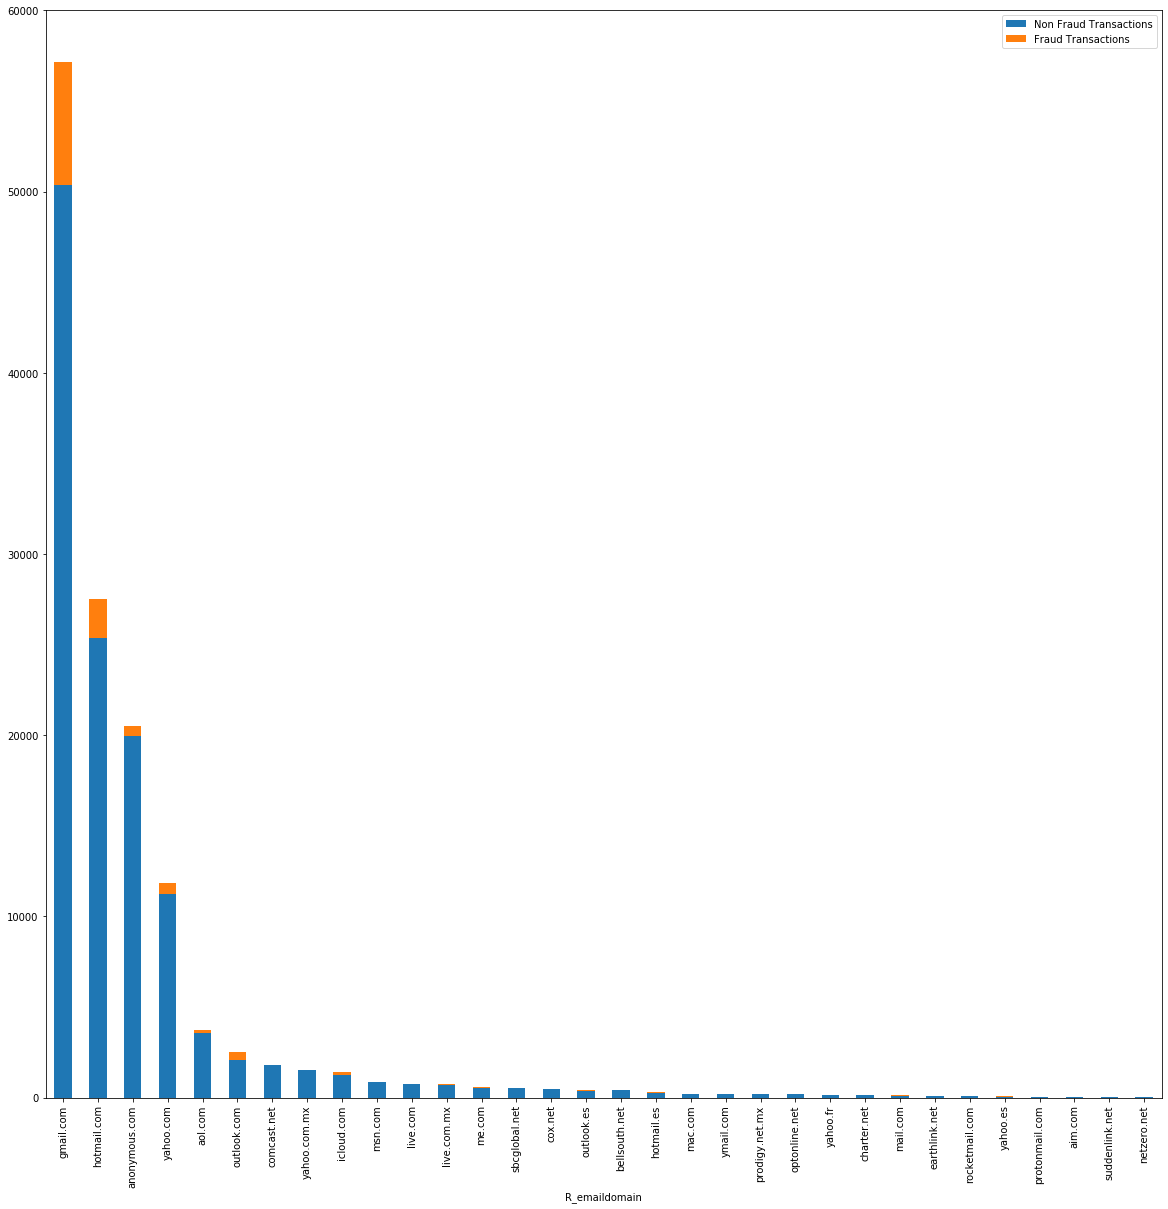

In [32]:
#display(HTML("<h4>ProductCD Entries for All Transactions </h4>"))
R_emaildomainFrequencyCount = getFrequencyCount(train_transaction, 'R_emaildomain', 'Frequency')
#ProductCDFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

#display(HTML("<h4>ProductCD Entries for Non Fraud Transactions </h4>"))
R_emaildomainNonFraudFrequencyCount = getFrequencyCount(train_transaction.loc[train_transaction["isFraud"] == 0], 'R_emaildomain', 'Frequency')
#ProductCDNonFraudFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

#display(HTML("<h4>ProductCD Entries for Fraud Transactions </h4>"))
R_emaildomainFraudFrequencyCount = getFrequencyCount(train_transaction.loc[train_transaction["isFraud"] == 1], 'R_emaildomain', 'Frequency')
#ProductCDFraudFrequencyCount.plot.bar(x = 'ProductCD', y = 'Frequency', rot = 0)

R_emaildomainFrequencyCount = R_emaildomainFrequencyCount.rename(columns = {'Frequency':'All Transactions'})
R_emaildomainNonFraudFrequencyCount = R_emaildomainNonFraudFrequencyCount.rename(columns = {'Frequency':'Non Fraud Transactions'})
R_emaildomainFraudFrequencyCount = R_emaildomainFraudFrequencyCount.rename(columns = {'Frequency':'Fraud Transactions'})

R_emaildomainCombinedFrequencyCount = pd.merge(R_emaildomainFrequencyCount,
                                           R_emaildomainNonFraudFrequencyCount,
                                           left_on = 'R_emaildomain', 
                                           right_on = 'R_emaildomain', 
                                           how = 'inner')

R_emaildomainCombinedFrequencyCount = pd.merge(R_emaildomainCombinedFrequencyCount,
                                           R_emaildomainFraudFrequencyCount,
                                           left_on = 'R_emaildomain', 
                                           right_on = 'R_emaildomain', 
                                           how = 'inner')

#ProductCDCombinedFrequencyCount.head(20)

R_emaildomainCombinedFrequencyCount.plot(x="R_emaildomain", y=["Non Fraud Transactions", "Fraud Transactions"], kind="bar",stacked = 'True',figsize = (20,20))
#sns.barplot(data = ProductCDCombinedFrequencyCount, x = 'ProductCD', y = 'Frequency', hue = 'Legend')

print("R_emaildomain Entries for All, Non Fraud and Fraud Transactions")
Card6CombinedFrequencyCount.head(10)

R_emaildomainFrequencyCount = R_emaildomainFrequencyCount.rename(columns = {'All Transactions':'Frequency'})
R_emaildomainNonFraudFrequencyCount = R_emaildomainNonFraudFrequencyCount.rename(columns = {'Non Fraud Transactions':'Frequency'})
R_emaildomainFraudFrequencyCount = R_emaildomainFraudFrequencyCount.rename(columns = {'Fraud Transactions':'Frequency'})

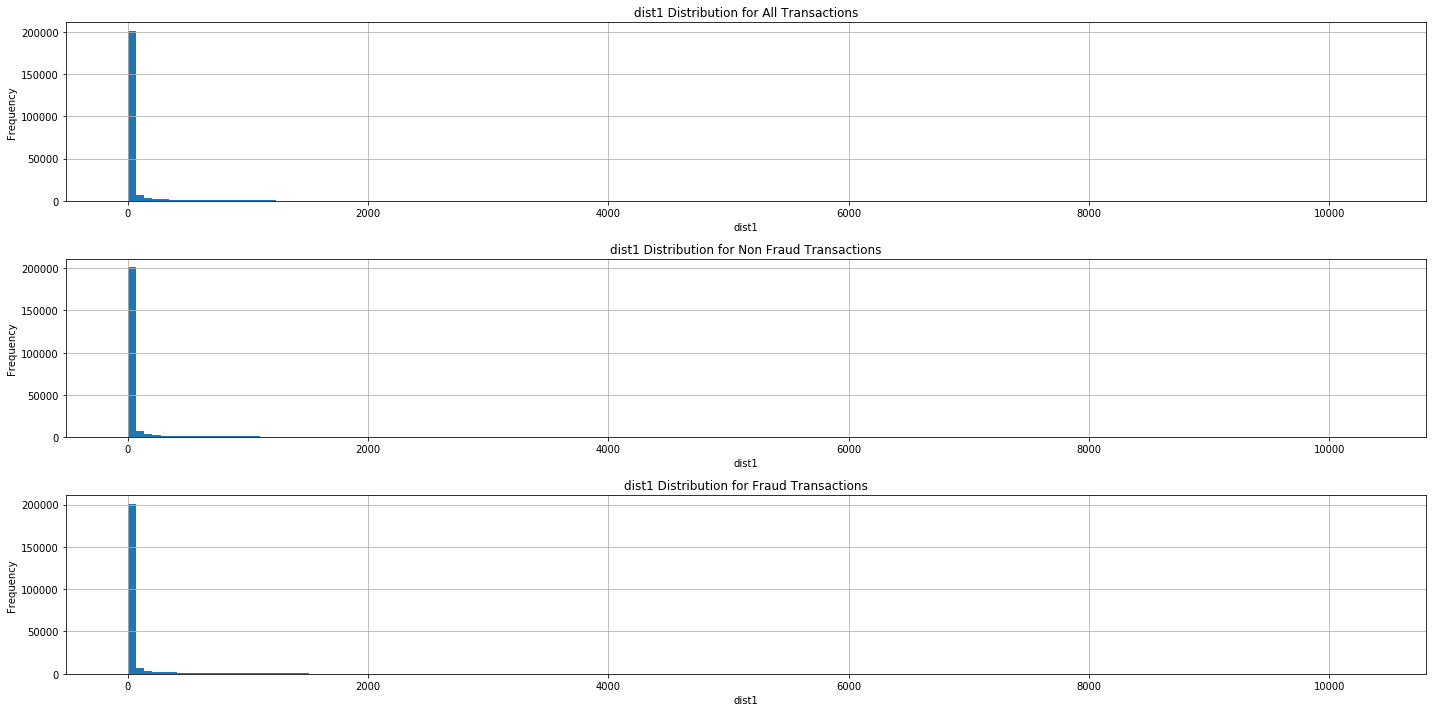

In [33]:

fig, axis = plt.subplots(3,1)
dist1_transaction = train_transaction['dist1']

dist1_all_chart = dist1_transaction.hist(bins = 150, figsize = (20,10), ax = axis[0])
dist1_all_chart.set_title('dist1 Distribution for All Transactions')
dist1_all_chart.set_xlabel('dist1')
dist1_all_chart.set_ylabel('Frequency')


dist1_nonfraud_transaction = train_transaction.loc[train_transaction['isFraud'] == 0]['dist1']

dist1_nonfraud_transaction = dist1_transaction.hist(bins = 150, figsize = (20,10), ax = axis[1])
dist1_nonfraud_transaction.set_title('dist1 Distribution for Non Fraud Transactions')
dist1_nonfraud_transaction.set_xlabel('dist1')
dist1_nonfraud_transaction.set_ylabel('Frequency')

dist1_fraud_transaction = train_transaction.loc[train_transaction['isFraud'] == 0]['dist1']

dist1_fraud_transaction = dist1_transaction.hist(bins = 150, figsize = (20,10), ax = axis[2])
dist1_fraud_transaction.set_title('dist1 Distribution for Fraud Transactions')
dist1_fraud_transaction.set_xlabel('dist1')
dist1_fraud_transaction.set_ylabel('Frequency')

fig.tight_layout()


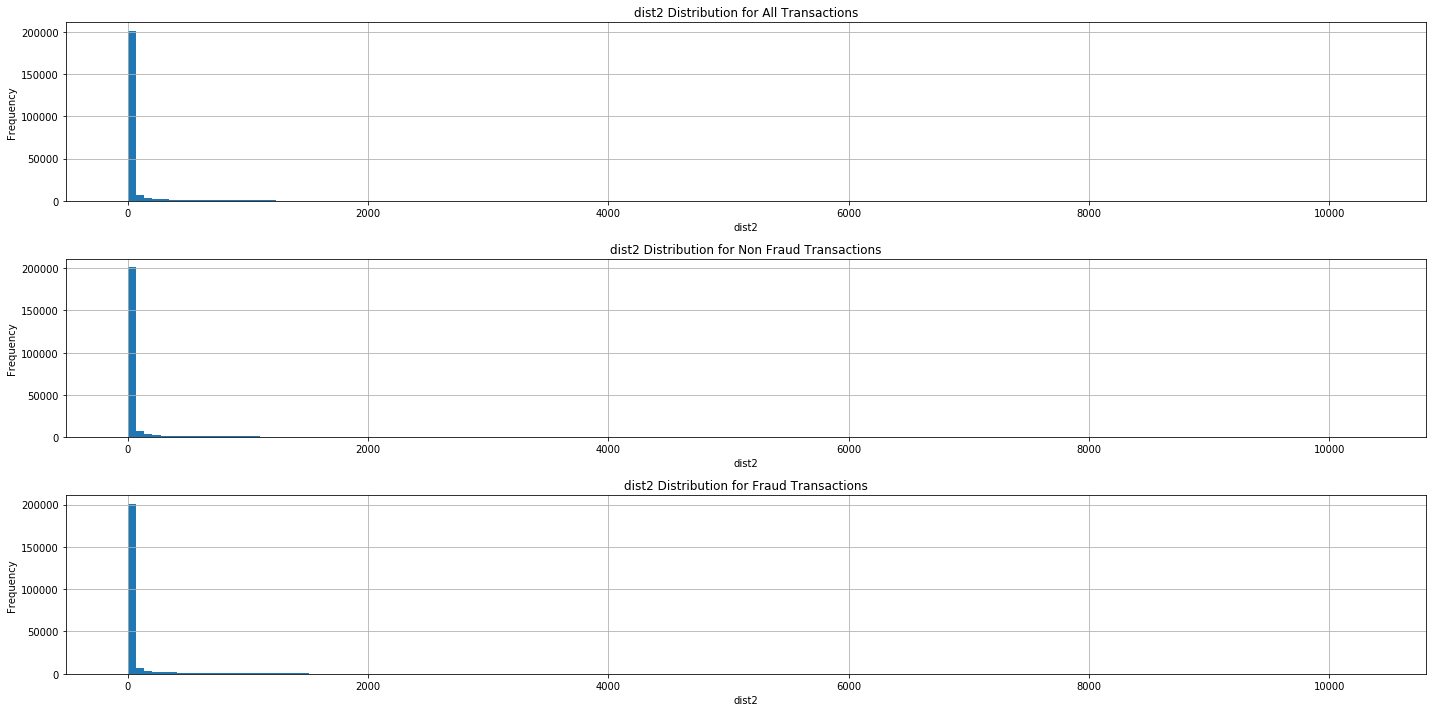

In [34]:
fig, axis = plt.subplots(3,1)
dist2_transaction = train_transaction['dist2']

dist2_all_chart = dist1_transaction.hist(bins = 150, figsize = (20,10), ax = axis[0])
dist2_all_chart.set_title('dist2 Distribution for All Transactions')
dist2_all_chart.set_xlabel('dist2')
dist2_all_chart.set_ylabel('Frequency')


dist2_nonfraud_transaction = train_transaction.loc[train_transaction['isFraud'] == 0]['dist2']

dist2_nonfraud_transaction = dist1_transaction.hist(bins = 150, figsize = (20,10), ax = axis[1])
dist2_nonfraud_transaction.set_title('dist2 Distribution for Non Fraud Transactions')
dist2_nonfraud_transaction.set_xlabel('dist2')
dist2_nonfraud_transaction.set_ylabel('Frequency')

dist2_fraud_transaction = train_transaction.loc[train_transaction['isFraud'] == 0]['dist2']

dist2_fraud_transaction = dist1_transaction.hist(bins = 150, figsize = (20,10), ax = axis[2])
dist2_fraud_transaction.set_title('dist2 Distribution for Fraud Transactions')
dist2_fraud_transaction.set_xlabel('dist2')
dist2_fraud_transaction.set_ylabel('Frequency')

fig.tight_layout()

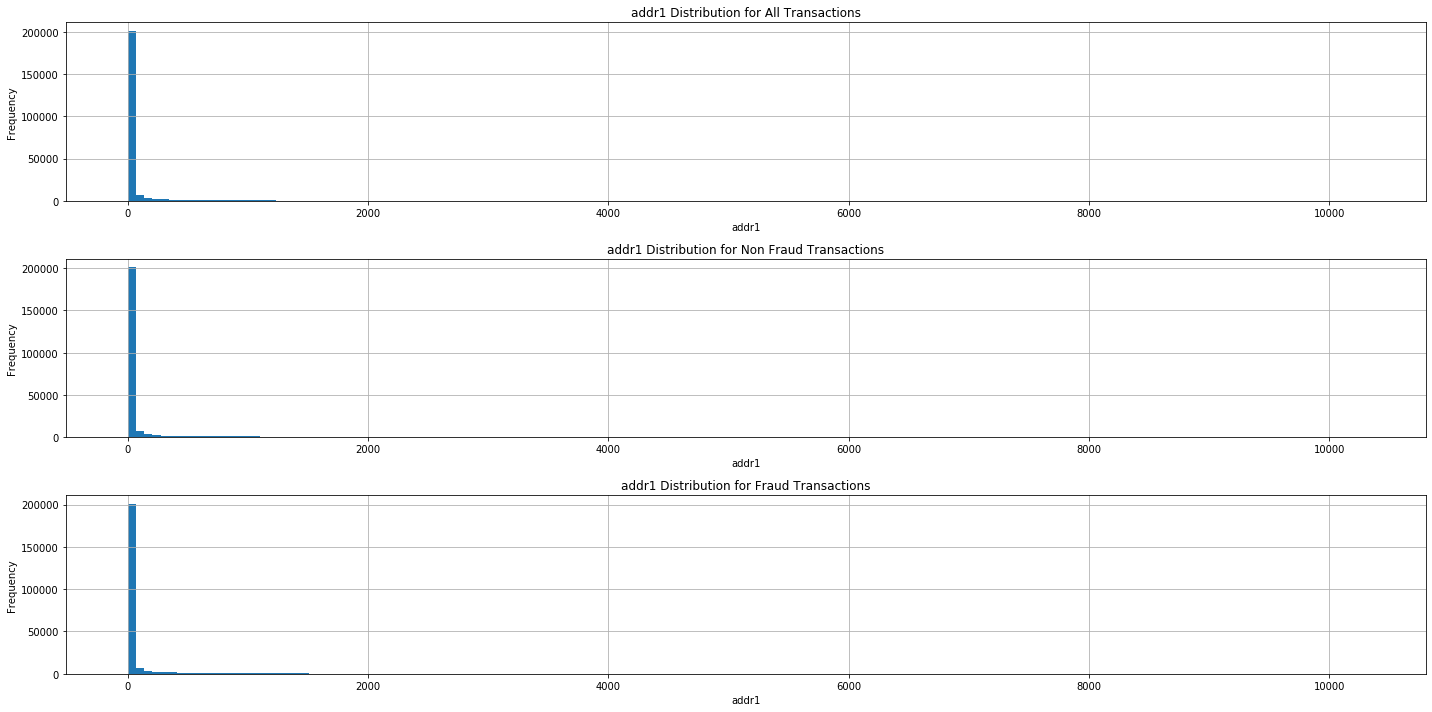

In [35]:
fig, axis = plt.subplots(3,1)
addr1_transaction = train_transaction['addr1']

addr1_all_chart = dist1_transaction.hist(bins = 150, figsize = (20,10), ax = axis[0])
addr1_all_chart.set_title('addr1 Distribution for All Transactions')
addr1_all_chart.set_xlabel('addr1')
addr1_all_chart.set_ylabel('Frequency')


addr1_nonfraud_transaction = train_transaction.loc[train_transaction['isFraud'] == 0]['addr1']

addr1_nonfraud_transaction = dist1_transaction.hist(bins = 150, figsize = (20,10), ax = axis[1])
addr1_nonfraud_transaction.set_title('addr1 Distribution for Non Fraud Transactions')
addr1_nonfraud_transaction.set_xlabel('addr1')
addr1_nonfraud_transaction.set_ylabel('Frequency')

addr1_fraud_transaction = train_transaction.loc[train_transaction['isFraud'] == 0]['addr1']

addr1_fraud_transaction = dist1_transaction.hist(bins = 150, figsize = (20,10), ax = axis[2])
addr1_fraud_transaction.set_title('addr1 Distribution for Fraud Transactions')
addr1_fraud_transaction.set_xlabel('addr1')
addr1_fraud_transaction.set_ylabel('Frequency')

fig.tight_layout()

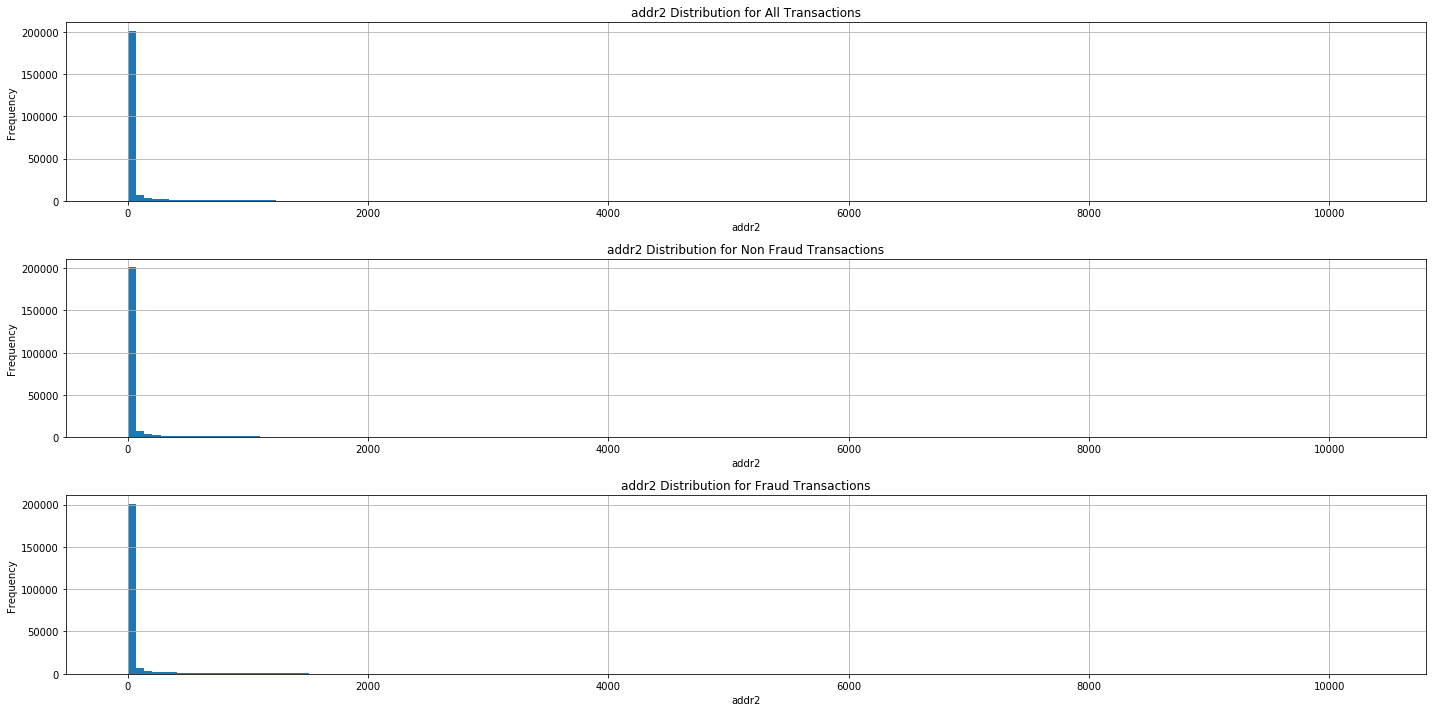

In [36]:
fig, axis = plt.subplots(3,1)
addr2_transaction = train_transaction['addr2']

addr2_all_chart = dist1_transaction.hist(bins = 150, figsize = (20,10), ax = axis[0])
addr2_all_chart.set_title('addr2 Distribution for All Transactions')
addr2_all_chart.set_xlabel('addr2')
addr2_all_chart.set_ylabel('Frequency')


addr2_nonfraud_transaction = train_transaction.loc[train_transaction['isFraud'] == 0]['addr2']

addr2_nonfraud_transaction = dist1_transaction.hist(bins = 150, figsize = (20,10), ax = axis[1])
addr2_nonfraud_transaction.set_title('addr2 Distribution for Non Fraud Transactions')
addr2_nonfraud_transaction.set_xlabel('addr2')
addr2_nonfraud_transaction.set_ylabel('Frequency')

addr2_fraud_transaction = train_transaction.loc[train_transaction['isFraud'] == 0]['addr2']

addr2_fraud_transaction = dist1_transaction.hist(bins = 150, figsize = (20,10), ax = axis[2])
addr2_fraud_transaction.set_title('addr2 Distribution for Fraud Transactions')
addr2_fraud_transaction.set_xlabel('addr2')
addr2_fraud_transaction.set_ylabel('Frequency')

fig.tight_layout()

## Part 2 - Transaction Frequency

The addr2 field gives a code (but not name) associated with the country of the purchaser.  TransactionDT shows the time passed from some reference for each transaction.  By looking at the time of day of the transactions, we can infer what waking hours are associated with the country relative to the reference time. Analyze the frequency distribution of transactions by time for the most frequent country code, as per the addr2 field. Plot this distribution. Explain your findings.  (15 points)

Lets find the country code with the highest count

In [37]:
addr2_freq_count = getFrequencyCount(train_transaction,'addr2','Frequency')
addr2_freq_count.sort_values('Frequency',inplace = True,ascending = False)
addr2_with_highest_frequency = addr2_freq_count.iloc[0]['addr2']
print("We see that addr2 with highest count is "+ str(addr2_with_highest_frequency))

We see that addr2 with highest count is 87.0


Let's just analyze the data with the the highest frequency of addr2

In [38]:
#Limit data to only those with highest frequency of addr2
sliced_data = train_transaction.loc[train_transaction['addr2'] == addr2_with_highest_frequency]
sliced_data['TransactionHour'] = sliced_data.apply(lambda row : int(row.TransactionDT / 3600) % 24, axis = 1)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3198cef0>]],
      dtype=object)

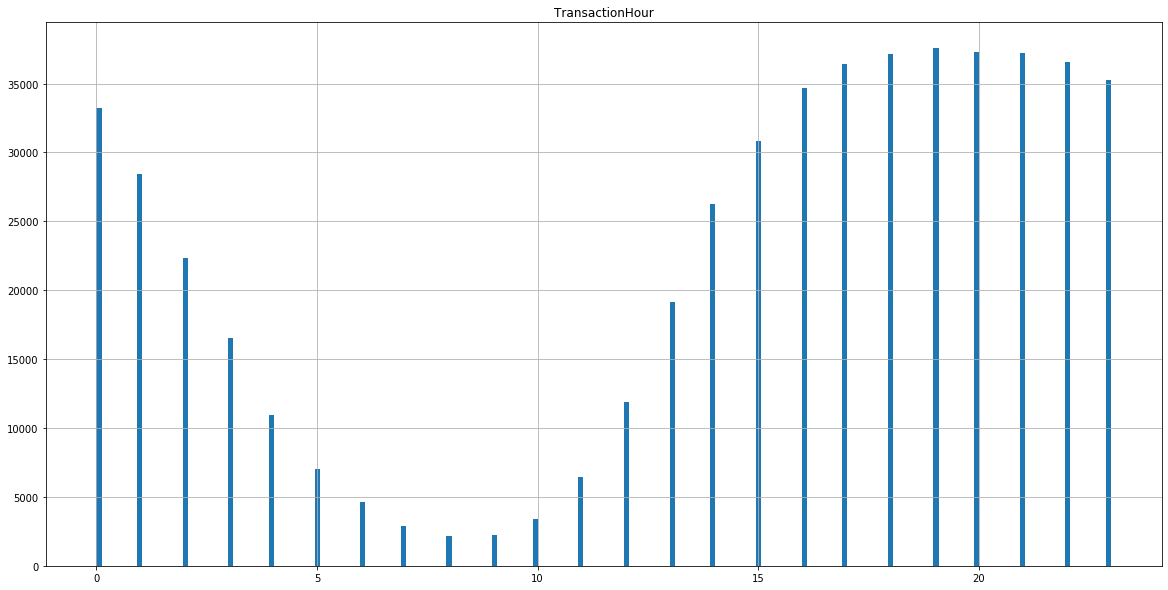

In [39]:
sliced_data.hist('TransactionHour', bins = 200, figsize = (20,10))

We assume that the hour with the biggest difference of transactions with next hour is the waking hour

In [40]:
sliced_data_by_transactionHour = getFrequencyCount(sliced_data,'TransactionHour','Frequency')
sliced_data_by_transactionHour.sort_values('TransactionHour',inplace = True)


INT_MIN = -sys.maxsize-1
max_diff = INT_MIN
waking_hour = -1
for i in range(0,24):
    diff = sliced_data_by_transactionHour.iloc[(i + 1) % 24]['Frequency'] - sliced_data_by_transactionHour.iloc[i]['Frequency']
    #print ("i - "+str(i)+", diff = "+str(diff))
    if(diff > max_diff):      
        max_diff = diff
        waking_hour = i

print(""+'Waking hour is : '+str(waking_hour)+"")


Waking hour is : 12


## Part 3 - Product Code

ProductCD refers to a product code. Make your best educated guess on which codes correspond to the most expensive products and which to the cheapest products. Justify with analysis. (10 points)


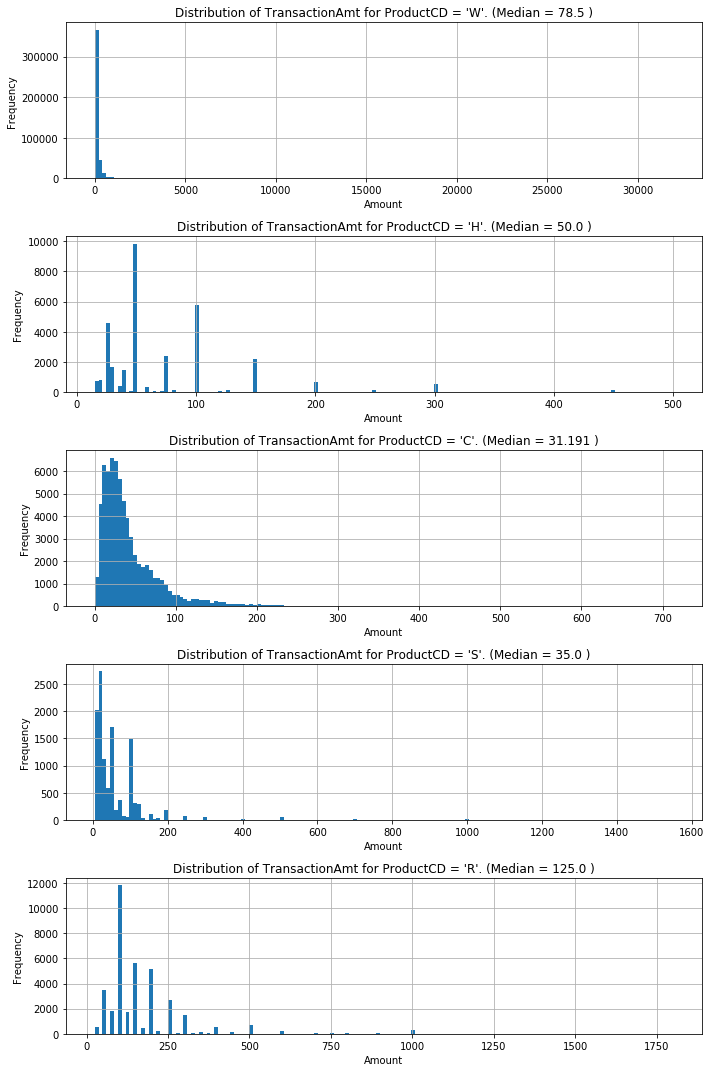

In [41]:
sliced_data = train_transaction[['ProductCD','TransactionAmt']]
unique_productCDs = sliced_data['ProductCD'].unique()

fig,axis = plt.subplots(len(unique_productCDs),figsize = (10,15))
median_values = {}
for i in range(0,len(unique_productCDs)):
    sliced_data.loc[sliced_data['ProductCD'] == unique_productCDs[i]].hist(ax = axis[i],bins = 150)
    median = sliced_data.loc[sliced_data['ProductCD'] == unique_productCDs[i]]['TransactionAmt'].median()
    axis[i].set_title('Distribution of TransactionAmt for ProductCD = \''+unique_productCDs[i]+'\'. (Median = '+str(median)+' )')
    axis[i].set_xlabel('Amount')
    axis[i].set_ylabel('Frequency')
    median_values[unique_productCDs[i]] = median
fig.tight_layout()


In [42]:
sorted_medians = sorted(median_values.items(), key=operator.itemgetter(1))
sorted_medians = collections.OrderedDict(sorted_medians)
els = list(sorted_medians.items())

print('Least Expensive Category - '+ str(els[0][0]))
print('Most Expensive Category - '+ str(els[-1][0]))

Least Expensive Category - C
Most Expensive Category - R


As we can see **ProductCD == R** and **ProductCD == W** have many outliers. Using mean to conclude the most expensive and least expensive category will skew results.

Taking the median will avoid falling towards the trap of the outliers. Hence from the plots and data, we see the **most expensive category is 'R'** and **the least expensive category is 'C'**

## Part 4 - Correlation Coefficient

Plot the distribution between the time of day and the purchase amount.  What is the correlation coefficient? Note that some cleaning is necessary to get a meaningful time of day.  (10 points)

Let's slice the data to contain TransactionDT and Purchase Amounts and visualize it

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


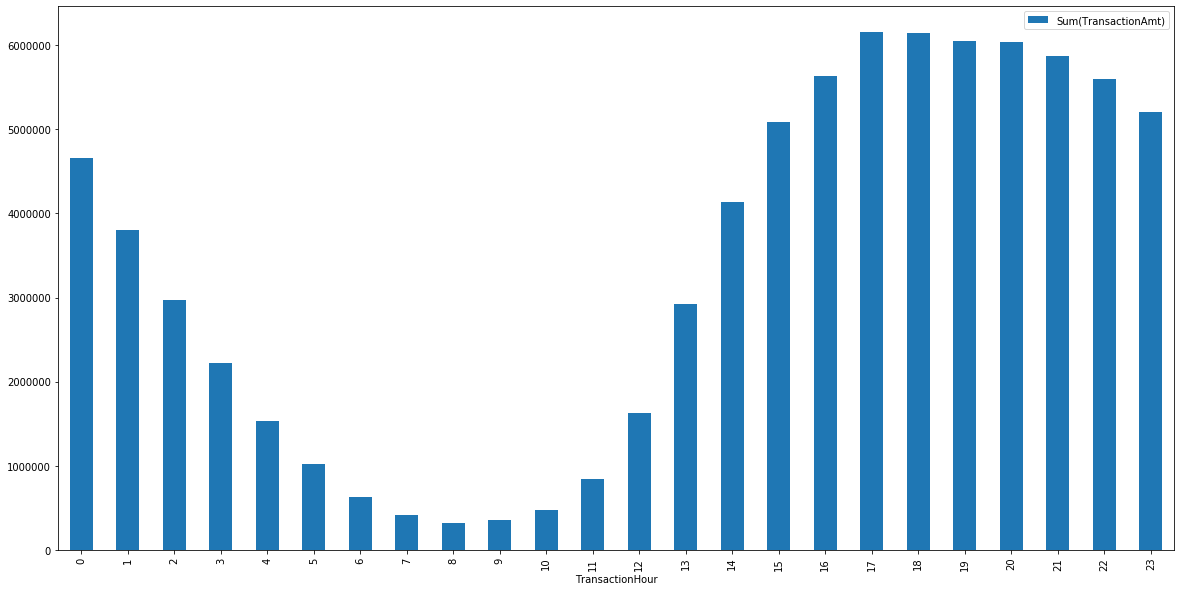

In [43]:
sliced_data = train_transaction[['TransactionDT','TransactionAmt']]
sliced_data['TransactionHour'] = sliced_data.apply(lambda row : int(row.TransactionDT / 3600) % 24, axis = 1)
sliced_data2 = sliced_data.groupby('TransactionHour',as_index = False).agg({"TransactionAmt" : "sum"})
sliced_data2 = sliced_data2.rename(columns = {'TransactionAmt': 'Sum(TransactionAmt)'})
sliced_data2.plot.bar(x = 'TransactionHour', y = 'Sum(TransactionAmt)',figsize = (20,10))


In [44]:
print("Correlation Coefficient between Sum of Transaction Amounts vs Hour of the day when transaction occured is "+ str(sliced_data2['TransactionHour'].corr(sliced_data2['Sum(TransactionAmt)']))+"")

Correlation Coefficient between Sum of Transaction Amounts vs Hour of the day when transaction occured is 0.6421174943084446


Let's see correlation of transaction hour with average of Transaction Amount

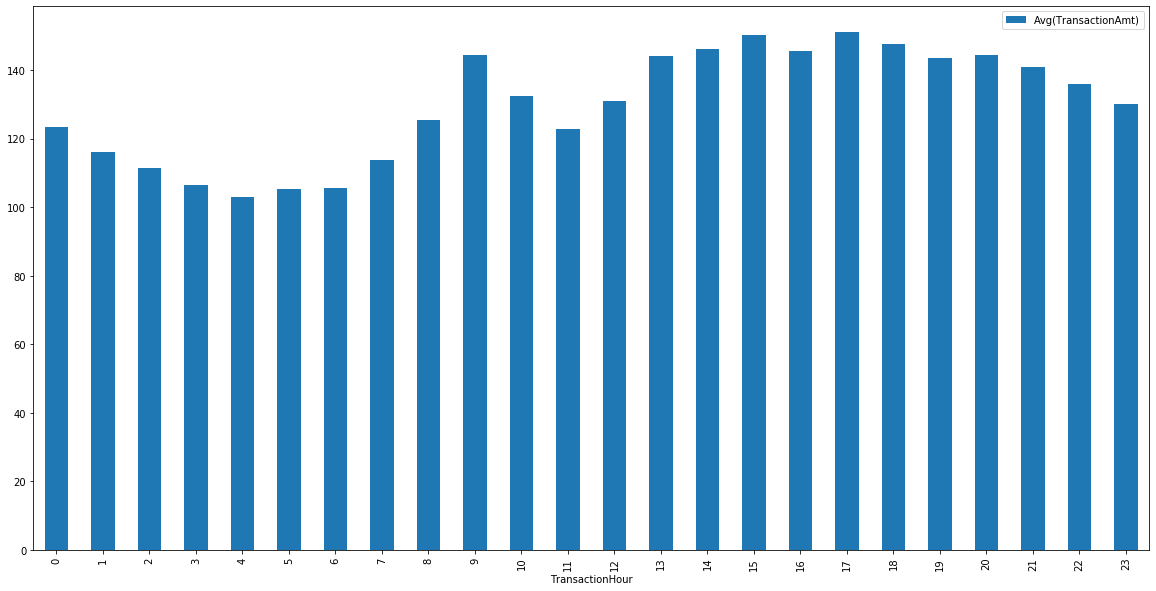

In [45]:
sliced_data3 = sliced_data.groupby('TransactionHour',as_index = False).agg({"TransactionAmt" : "mean"})
sliced_data3 = sliced_data3.rename(columns = {'TransactionAmt': 'Avg(TransactionAmt)'})
sliced_data3.plot.bar(x = 'TransactionHour', y = 'Avg(TransactionAmt)', figsize = (20,10))



In [46]:
print("Correlation Coefficient between Average of Transaction Amounts vs Hour of the day when transaction occured is "+ str(sliced_data3['TransactionHour'].corr(sliced_data3['Avg(TransactionAmt)']))+"")

Correlation Coefficient between Average of Transaction Amounts vs Hour of the day when transaction occured is 0.7506793476618114


## Part 6 - Prediction Model

Now, try to build a prediction model that works to solve the task.  You are allowed to use  additional variables from the dataset if you wish. Perhaps it will use linear regression. Perhaps it will preprocess features (e.g. normalize or scale the input vector, convert non-numerical value into float, or do a special treatment of missing values). Perhaps it will use a different machine learning approach (e.g. nearest neighbors, random forests)

Let's process ***TransactionDate*** to convert it to hour

In [47]:
train_transactions_and_identity = pd.merge(train_transaction,
                                           train_identity,
                                           left_on = 'TransactionID', 
                                           right_on = 'TransactionID', 
                                           how = 'left').filter(column_names)

test_transactions_and_identity = pd.merge(test_transaction,
                                           test_identity,
                                           left_on = 'TransactionID', 
                                           right_on = 'TransactionID', 
                                           how = 'left').filter(column_names)



In [48]:
print('The rows in our dataset is - '+str(train_transactions_and_identity.shape[0])+'')

The rows in our dataset is - 590540


In [49]:
train_transactions_and_identity['TransactionDT'] = train_transactions_and_identity['TransactionDT'].apply(lambda v : int(v / 3600) % 24)
test_transactions_and_identity['TransactionDT'] = test_transactions_and_identity['TransactionDT'].apply(lambda v : int(v / 3600) % 24)


Let's see if thewre are any ***NaN*** values

In [50]:
train_transactions_and_identity.head(20)

,TransactionID,DeviceType,DeviceInfo,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,isFraud
0,2987000,NaN,NaN,0,68.500,W,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN,0
1,2987001,NaN,NaN,0,29.000,W,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN,0
2,2987002,NaN,NaN,0,59.000,W,visa,debit,outlook.com,NaN,330.0,87.0,287.0,NaN,0
3,2987003,NaN,NaN,0,50.000,W,mastercard,debit,yahoo.com,NaN,476.0,87.0,NaN,NaN,0
4,2987004,mobile,SAMSUNG SM-G892A Build/NRD90M,0,50.000,H,mastercard,credit,gmail.com,NaN,420.0,87.0,NaN,NaN,0
5,2987005,NaN,NaN,0,49.000,W,visa,debit,gmail.com,NaN,272.0,87.0,36.0,NaN,0
6,2987006,NaN,NaN,0,159.000,W,visa,debit,yahoo.com,NaN,126.0,87.0,0.0,NaN,0
7,2987007,NaN,NaN,0,422.500,W,visa,debit,mail.com,NaN,325.0,87.0,NaN,NaN,0
8,2987008,mobile,iOS Device,0,15.000,H,visa,debit,anonymous.com,NaN,337.0,87.0,NaN,NaN,0
9,2987009,NaN,NaN,0,117.000,W,mastercard,debit,yahoo.com,NaN,204.0,87.0,19.0,NaN,0


Let's see the number of NaN values for each column


In [51]:
column_names = list(train_transactions_and_identity.columns.values)
for column_name in column_names:
    print('Column "'+str(column_name)+'" has '+str(train_transactions_and_identity[column_name].isna().sum())+' NaN values. Proportion - '+str(train_transactions_and_identity[column_name].isna().sum() / train_transactions_and_identity.shape[0]))

Column "TransactionID" has 0 NaN values. Proportion - 0.0
Column "DeviceType" has 449730 NaN values. Proportion - 0.7615572188166763
Column "DeviceInfo" has 471874 NaN values. Proportion - 0.7990551021099332
Column "TransactionDT" has 0 NaN values. Proportion - 0.0
Column "TransactionAmt" has 0 NaN values. Proportion - 0.0
Column "ProductCD" has 0 NaN values. Proportion - 0.0
Column "card4" has 1577 NaN values. Proportion - 0.00267043722694483
Column "card6" has 1571 NaN values. Proportion - 0.0026602770345785214
Column "P_emaildomain" has 94456 NaN values. Proportion - 0.1599485216920107
Column "R_emaildomain" has 453249 NaN values. Proportion - 0.7675161716395164
Column "addr1" has 65706 NaN values. Proportion - 0.1112642666034477
Column "addr2" has 65706 NaN values. Proportion - 0.1112642666034477
Column "dist1" has 352271 NaN values. Proportion - 0.596523520845328
Column "dist2" has 552913 NaN values. Proportion - 0.9362837403054831
Column "isFraud" has 0 NaN values. Proportion - 0

Alright. So we see columns of various types having various amounts of NaN values

### <u> Data PreProcessing for ML</u>
Standard practices include data imputation by filling the mean in number columns and a standard unique string for String columns. Also

Let's do that

In [52]:
train_transactions_and_identity.dtypes

TransactionID       int64
DeviceType         object
DeviceInfo         object
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card4              object
card6              object
P_emaildomain      object
R_emaildomain      object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
isFraud             int64
dtype: object

Looking at the data above, 
* I will drop ***dist2*** column (93% have no values) (Done)
* I will drop ***dist1*** column (60% have no values)(Done)
* I will put ***mean*** in ***addr1***  (11% have no values)
* I will put ***0*** in ***addr2*** (11% have no values) (Reason - This is some sort of a location code)(Done)
* I will drop ***R_emaildomain*** column (77% have no value)(Done)
* I will put ***None*** for ***P_emaildomain*** column (15% have no value)(Done)
* I will put ***None*** for ***card4*** column (0.2% have no value)(Done)
* I will put ***None*** for ***card6*** column (0.2% have no value)(Done)
* I will drop ***DeviceType*** column (76% have no values)(Done)
* I will drop ***DeviceInfo*** column (79% have no values)(Done)
* I will drop ***TransactionID*** column as it is a unique ID (Done)



In [53]:
def drop_columns(dataframe,columns):
    temp_df = dataframe.copy()
    for column in columns:
        temp_df.drop(column, axis=1, inplace=True)
    return temp_df

def put_zero_for_filling(dataframe,columns):
    for column in columns:
        dataframe[column].fillna(0, inplace = True)

def put_default_string(dataframe, column, default_string):
    dataframe[column].fillna(default_string, inplace = True)

def replace_with_mean(dataframe, column):
    dataframe[[column]] = dataframe[[column]].fillna(value = dataframe[column].mean())
    
def full_fledge_preprocess(dataframe):
    preprocessed_dataframe = drop_columns(dataframe,['dist2','dist1','R_emaildomain','DeviceType','DeviceInfo'])
    put_zero_for_filling(preprocessed_dataframe,['addr2'])
    put_default_string(preprocessed_dataframe,'P_emaildomain','None')
    put_default_string(preprocessed_dataframe,'card4','None')
    put_default_string(preprocessed_dataframe,'card6','None')
    replace_with_mean(preprocessed_dataframe,'addr1')
    return preprocessed_dataframe
    
preprocessed_train_transactions_and_identity = full_fledge_preprocess(train_transactions_and_identity)
preprocessed_test_transactions_and_identity = full_fledge_preprocess(test_transactions_and_identity)


In [54]:
preprocessed_train_transactions_and_identity.dtypes

TransactionID       int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card4              object
card6              object
P_emaildomain      object
addr1             float64
addr2             float64
isFraud             int64
dtype: object

We see there are label data for a few columns - ***card4, card6, P_emaildomain***
Let's encode it using OneHotEncoder (http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example)

In [55]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

def data_fix(df1,df2):
    df1_rows = df1.shape[0]
    df2['isFraud'] = -1
    full_df = pd.concat([df1,df2])
    for column_name in list(full_df.columns.values):
        if(full_df[column_name].dtype == np.object):
            full_df = pd.concat([full_df,pd.get_dummies(full_df[column_name],prefix = column_name)],axis = 1)
            full_df.drop([column_name], axis = 1, inplace = True)
    df1 = full_df[:df1_rows]
    df2 = full_df[df1_rows:]
    df2.drop('isFraud', axis = 1, inplace = True)
    return df1,df2

preprocessed_train_transactions_and_identity,preprocessed_test_transactions_and_identity = data_fix(preprocessed_train_transactions_and_identity,preprocessed_test_transactions_and_identity)
preprocessed_train_transactions_and_identity.drop('TransactionID', axis = 1, inplace = True)

#for column_name in list(preprocessed_train_transactions_and_identity.columns.values):
#    if(preprocessed_train_transactions_and_identity[column_name].dtype == np.object):
#        preprocessed_train_transactions_and_identity = pd.concat([preprocessed_train_transactions_and_identity,pd.get_dummies(preprocessed_train_transactions_and_identity[column_name],prefix = column_name)],axis = 1)
#        preprocessed_train_transactions_and_identity.drop([column_name],axis = 1,inplace = True)
#        preprocessed_test_transactions_and_identity = pd.concat([preprocessed_test_transactions_and_identity,pd.get_dummies(preprocessed_test_transactions_and_identity[column_name],prefix = column_name)],axis = 1)
#        preprocessed_test_transactions_and_identity.drop([column_name],axis = 1,inplace = True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Lets' train with Scikit Learn Libraries. But first, lets split data for training and testing validation. I'll choose 85% for training and 15% for testing validation

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_train_transactions_and_identity.loc[:,preprocessed_train_transactions_and_identity.columns != 'isFraud'], preprocessed_train_transactions_and_identity['isFraud'], test_size=0.15)



As suggested, let's use Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

regression_object = RandomForestRegressor(n_estimators=150)
regression_object.fit(X_train,y_train)




RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
prediction_test = regression_object.predict(X_test)
print(accuracy_score(y_test , prediction_test.round()))

0.9716982197085153


In [59]:
X_train.columns

Index(['TransactionDT', 'TransactionAmt', 'addr1', 'addr2', 'ProductCD_C',
       'ProductCD_H', 'ProductCD_R', 'ProductCD_S', 'ProductCD_W',
       'card4_None', 'card4_american express', 'card4_discover',
       'card4_mastercard', 'card4_visa', 'card6_None', 'card6_charge card',
       'card6_credit', 'card6_debit', 'card6_debit or credit',
       'P_emaildomain_None', 'P_emaildomain_aim.com',
       'P_emaildomain_anonymous.com', 'P_emaildomain_aol.com',
       'P_emaildomain_att.net', 'P_emaildomain_bellsouth.net',
       'P_emaildomain_cableone.net', 'P_emaildomain_centurylink.net',
       'P_emaildomain_cfl.rr.com', 'P_emaildomain_charter.net',
       'P_emaildomain_comcast.net', 'P_emaildomain_cox.net',
       'P_emaildomain_earthlink.net', 'P_emaildomain_embarqmail.com',
       'P_emaildomain_frontier.com', 'P_emaildomain_frontiernet.net',
       'P_emaildomain_gmail', 'P_emaildomain_gmail.com',
       'P_emaildomain_gmx.de', 'P_emaildomain_hotmail.co.uk',
       'P_emaildomai

In [60]:
final_prediction = regression_object.predict(preprocessed_test_transactions_and_identity.loc[:,preprocessed_test_transactions_and_identity.columns != 'TransactionID' ])
final_prediction.round()

results = pd.DataFrame({'TransactionID':preprocessed_test_transactions_and_identity['TransactionID'] , 'isFraud' : final_prediction[:]})
results.to_csv('../IEEE_CIS_Fraud_Transaction_Data/submission_2.csv', index=False)

## Part 7 - Final Result


Predict all the fraud cases for the test instances at file “sample_submission.csv”. Write the result into a csv file and submit it to the website. You should do this for every model you develop. Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. (15 points)

Rank - 5261 (as last seen)

Score - 0.6983 (Another submission with all columns in data was taken came in at 0.8242. I will not use the 0.8242 AUC as it is beyond the scope of the assignment (other columns considered))

Number of Entries - 3

In [61]:
%%html
<img src = "../IEEE_CIS_Fraud_Transaction_Data/rank.png"/>

Link - https://www.kaggle.com/prateeknarsbu

## Part 5 - Interesting Plot

Create a plot of your own using the dataset that you think reveals something very interesting. Explain what it is, and anything else you learned.  (15 points)

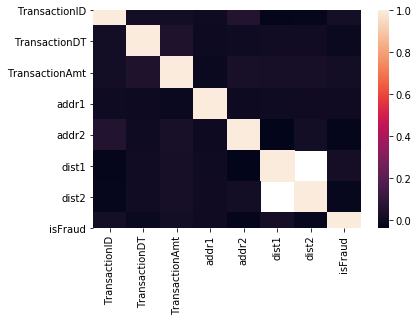

In [62]:
sns.heatmap(train_transactions_and_identity.corr())

One of the interesting polts we found was the wave curve of the transactions in Part 4